<a href="https://colab.research.google.com/github/santheartist/small.projects/blob/main/Assignment_1_Sanchit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0 | Loss: 0.262916
Epoch 500 | Loss: 0.045298
Epoch 1000 | Loss: 0.005853
Epoch 1500 | Loss: 0.002788
Epoch 2000 | Loss: 0.001787
Epoch 2500 | Loss: 0.001302
Epoch 3000 | Loss: 0.001019
Epoch 3500 | Loss: 0.000834
Epoch 4000 | Loss: 0.000705
Epoch 4500 | Loss: 0.000609
Epoch 5000 | Loss: 0.000536
Epoch 5500 | Loss: 0.000478
Epoch 6000 | Loss: 0.000431
Epoch 6500 | Loss: 0.000392
Epoch 7000 | Loss: 0.000360
Epoch 7500 | Loss: 0.000332
Epoch 8000 | Loss: 0.000309
Epoch 8500 | Loss: 0.000288
Epoch 9000 | Loss: 0.000270
Epoch 9500 | Loss: 0.000254


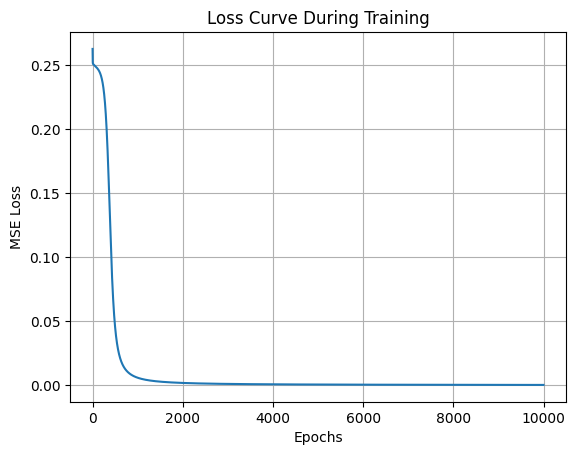


Predictions:
Input: [0 0] -> Predicted: [[0.]]
Input: [0 1] -> Predicted: [[1.]]
Input: [1 0] -> Predicted: [[1.]]
Input: [1 1] -> Predicted: [[0.]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def sigmoid_fn(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    return z * (1 - z)

# Loss Function: Mean Squared Error
def mean_squared_error(actual, predicted):
    return np.mean(np.square(actual - predicted))

# Neural Network Class
class SimpleNeuralNet:
    def __init__(self, n_inputs, n_hidden, n_outputs, alpha=0.1):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.alpha = alpha

        # Initialize weights and biases
        self.W1 = np.random.uniform(-1, 1, (n_inputs, n_hidden))
        self.b1 = np.zeros((1, n_hidden))

        self.W2 = np.random.uniform(-1, 1, (n_hidden, n_outputs))
        self.b2 = np.zeros((1, n_outputs))

    def forward_pass(self, X):
        self.hidden_layer_input = np.dot(X, self.W1) + self.b1
        self.hidden_layer_output = sigmoid_fn(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.W2) + self.b2
        self.output = sigmoid_fn(self.output_layer_input)

        return self.output

    def backward_pass(self, X, y, pred):
        output_error = y - pred
        output_delta = output_error * sigmoid_deriv(pred)

        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * sigmoid_deriv(self.hidden_layer_output)

        # Update weights and biases
        self.W2 += self.hidden_layer_output.T.dot(output_delta) * self.alpha
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * self.alpha

        self.W1 += X.T.dot(hidden_delta) * self.alpha
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * self.alpha

    def fit(self, X, y, iterations=10000):
        history = []
        for i in range(iterations):
            prediction = self.forward_pass(X)
            self.backward_pass(X, y, prediction)
            loss = mean_squared_error(y, prediction)
            history.append(loss)

            if i % 500 == 0:
                print(f"Epoch {i} | Loss: {loss:.6f}")
        return history

    def predict(self, X):
        return self.forward_pass(X)

# XOR Dataset
np.random.seed(42)
X_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [0]])

# Train Model
model = SimpleNeuralNet(n_inputs=2, n_hidden=4, n_outputs=1, alpha=0.5)
losses = model.fit(X_train, y_train, iterations=10000)

# Plotting the training loss
plt.plot(losses)
plt.title("Loss Curve During Training")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# Evaluate model
print("\nPredictions:")
for x in X_train:
    prediction = model.predict(x.reshape(1, -1))
    print(f"Input: {x} -> Predicted: {np.round(prediction)}")

